In [11]:
from rdkit import Chem
from rdkit import DataStructs
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt 

In [14]:
## Matplotlib defaults ##
colors = {"1980": "#aa0f35", 
         "1985": "#fdc799",
         "1990": "#abdbfc",
         "1995": "#a0a75c",
         "2000": "#603734",
         "2005": "#009ecb",
         "2010": "#430057",
         "2015": "#f89b00"}

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rcParams.update({'font.size': 22})

Testing: Tanimoto similarity across 1980-1984 top 100 degree compounds

In [31]:
df = pd.read_csv("Data/Cpd_Data/highest_degree_data_1980_1984.csv")
print(df.head())
df = df.sort_values(by="degree", ascending=False)

   Unnamed: 0 SureChEMBL_ID                              SMILES  \
0          12     SCHEMBL34            CC1=CC=C(C=C1)S(O)(=O)=O   
1          24     SCHEMBL63  O=C(OOC(=O)C1=CC=CC=C1)C1=CC=CC=C1   
2          48    SCHEMBL121                 CC(CN=NCC(C)C#N)C#N   
3          49    SCHEMBL122             CC(C)(N=NC(C)(C)C#N)C#N   
4          60    SCHEMBL147                       OCC1=CC=CC=C1   

                                               InChI  \
0  InChI=1S/C7H8O3S/c1-6-2-4-7(5-3-6)11(8,9)10/h2...   
1  InChI=1S/C14H10O4/c15-13(11-7-3-1-4-8-11)17-18...   
2  InChI=1S/C8H12N4/c1-7(3-9)5-11-12-6-8(2)4-10/h...   
3  InChI=1S/C8H12N4/c1-7(2,5-9)11-12-8(3,4)6-10/h...   
4      InChI=1S/C7H8O/c8-6-7-4-2-1-3-5-7/h1-5,8H,6H2   

                      InChIKey  degree  pref_attach_value  \
0  JOXIMZWYDAKGHI-UHFFFAOYSA-N  791320       13251.932203   
1  OMPJBNCRMGITSC-UHFFFAOYSA-N  303092        5051.491525   
2  FLZDRQXGVYVYSL-VAWYXSNFSA-N  171269        2859.745763   
3  OZAIFHULBGXAK

In [24]:
fps = [Chem.RDKFingerprint(Chem.MolFromInchi(inchi)) for inchi in df["InChI"]]    

In [25]:
matrix = np.zeros((len(fps), len(fps)))
combinations = itertools.combinations(np.arange(0,len(fps),1),2)

In [26]:
for c in combinations:
    matrix[c[0]][c[1]] = DataStructs.FingerprintSimilarity(fps[c[0]],fps[c[1]])

In [27]:
""" Creates a heatmap given a filename of a pickled np matrix """
def heatmap(m):
    #Make it symmetrical (for visualizations)
    i_lower = np.tril_indices(len(m), -1)
    m[i_lower] = m.T[i_lower]
    
    plt.imshow(m)

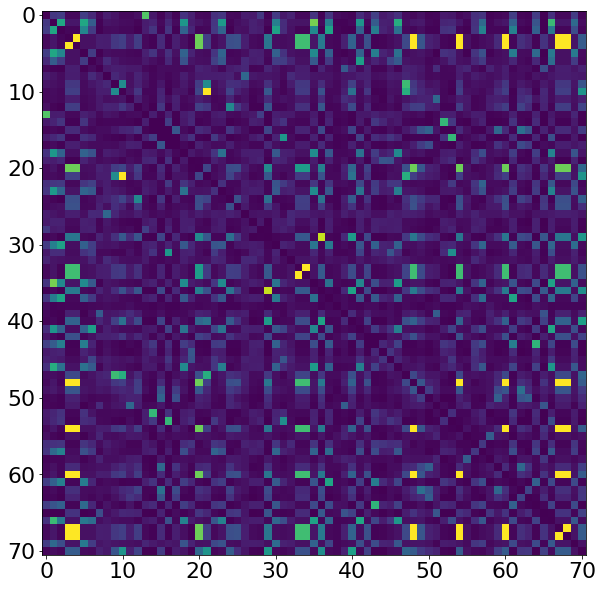

In [28]:
plt.figure(figsize=(10,10))
heatmap(matrix)